# GFF Processing Metrics

The Enrichr file has lots of information about pathways.  We will characterize the system response given a set of genes using these pathways.

# Libraries

In [1]:
# Libraries


# Reading the Enrichr file
import json

In [5]:
# Set the data folder.
#data_folder = '/media/apollo/Samsung_T5/transfer/mayur/'
data_folder = '/home/mad1188/Enrichr_database/'

# Enrichr results

First, read in the Enrichr file.

In [24]:
# Enrichr file.
with open(data_folder + 'api_results.json', 'r') as f:
    enrichr = json.load(f)

Work with perhaps the first 10 genes.

In [25]:
# First 10 genes.
enrichr = enrichr[0:10]

What genes do we have?

In [26]:
# Genes.
genes = [i.keys() for i in enrichr]

In [27]:
genes

[dict_keys(['DDX11L17']),
 dict_keys(['PRDM16']),
 dict_keys(['PEX10']),
 dict_keys(['RPL21P21']),
 dict_keys(['LINC01345']),
 dict_keys(['EEF1DP6']),
 dict_keys(['PEX14']),
 dict_keys(['LINC01646']),
 dict_keys(['LINC01777']),
 dict_keys(['LINC02782'])]

What options do we have for enrichment?

In [28]:
# Enrichment options.
enrichment_options = []

for i in enrichr:
    for k, v in i.items():
        for s, t in v.items():
            enrichment_options.append(s)

enrichment_options = list(set(enrichment_options))
enrichment_options.sort()

In [29]:
enrichment_options

['ARCHS4_Cell-lines',
 'ARCHS4_IDG_Coexp',
 'ARCHS4_Kinases_Coexp',
 'ARCHS4_TFs_Coexp',
 'ARCHS4_Tissues',
 'Achilles_fitness_decrease',
 'Aging_Perturbations_from_GEO_down',
 'Aging_Perturbations_from_GEO_up',
 'Allen_Brain_Atlas_10x_scRNA_2021',
 'Allen_Brain_Atlas_down',
 'Allen_Brain_Atlas_up',
 'BioPlanet_2019',
 'BioPlex_2017',
 'CCLE_Proteomics_2020',
 'COVID-19_Related_Gene_Sets',
 'COVID-19_Related_Gene_Sets_2021',
 'Cancer_Cell_Line_Encyclopedia',
 'CellMarker_Augmented_2021',
 'ChEA_2013',
 'ChEA_2015',
 'ChEA_2016',
 'ChEA_2022',
 'Chromosome_Location',
 'Chromosome_Location_hg19',
 'ClinVar_2019',
 'DSigDB',
 'DepMap_CRISPR_GeneDependency_CellLines_2023',
 'DepMap_WG_CRISPR_Screens_Broad_CellLines_2019',
 'DepMap_WG_CRISPR_Screens_Sanger_CellLines_2019',
 'Descartes_Cell_Types_and_Tissue_2021',
 'Diabetes_Perturbations_GEO_2022',
 'DisGeNET',
 'Disease_Perturbations_from_GEO_down',
 'Disease_Perturbations_from_GEO_up',
 'Disease_Signatures_from_GEO_down_2014',
 'Disease_S

In [30]:
# Dictionary to store pathways for each gene in the 'KEGG_2021_Human' database
kegg_pathways = {}

for gene_result in enrichr:
    gene_name = list(gene_result.keys())[0]
    gene_data = gene_result[gene_name]

    # Check if 'KEGG_2021_Human' is in the results for the gene
    if 'KEGG_2021_Human' in gene_data:
        kegg_pathways[gene_name] = gene_data['KEGG_2021_Human']

# Print the pathways for each gene in the 'KEGG_2021_Human' database
for gene, pathways in kegg_pathways.items():
    print(f"Gene: {gene}")
    for pathway in pathways:
        print(f"  Pathway: {pathway}")
    print()

Gene: PRDM16
  Pathway: Lysine degradation
  Pathway: Thermogenesis

Gene: PEX10
  Pathway: Peroxisome

Gene: PEX14
  Pathway: Peroxisome



In [32]:
import json
import matplotlib.pyplot as plt

# Set the data folder.
data_folder = '/home/mad1188/Enrichr_database/'

# Enrichr file.
with open(data_folder + 'api_results.json', 'r') as f:
    enrichr = json.load(f)

In [33]:
# First 10 genes.
enrichr = enrichr[0:10]


In [34]:
# Dictionary to store the count of genes for each pathway
pathway_counts = {}

for gene_result in enrichr:
    gene_name = list(gene_result.keys())[0]
    gene_data = gene_result[gene_name]

    # Process KEGG pathways
    if 'KEGG_2021_Human' in gene_data:
        for pathway in gene_data['KEGG_2021_Human']:
            pathway_counts[pathway] = pathway_counts.get(pathway, 0) + 1

    # Process Reactome pathways
    if 'Reactome_2022' in gene_data:
        for pathway in gene_data['Reactome_2022']:
            pathway_counts[pathway] = pathway_counts.get(pathway, 0) + 1


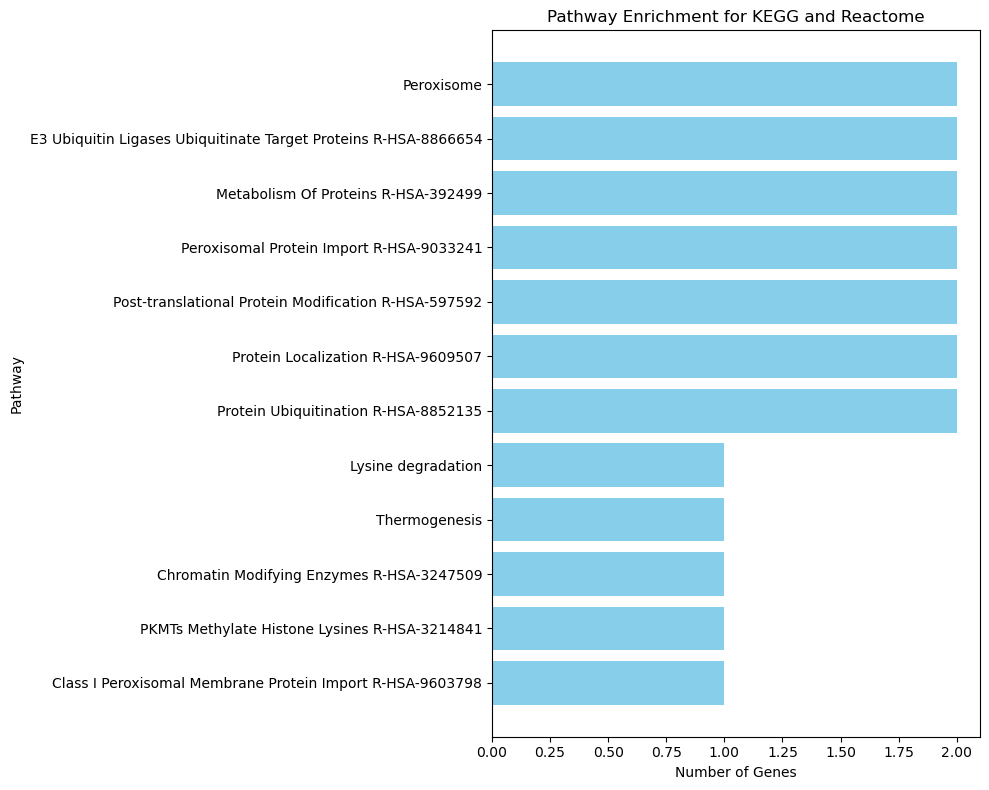

In [35]:
# Sort pathways by count
sorted_pathways = sorted(pathway_counts.items(), key=lambda x: x[1], reverse=True)

# Separate pathway names and counts for plotting
pathway_names = [pathway[0] for pathway in sorted_pathways]
pathway_counts = [pathway[1] for pathway in sorted_pathways]

# Create a bar graph
plt.figure(figsize=(10, 8))
plt.barh(pathway_names, pathway_counts, color='skyblue')
plt.xlabel('Number of Genes')
plt.ylabel('Pathway')
plt.title('Pathway Enrichment for KEGG and Reactome')
plt.gca().invert_yaxis()  # Invert y-axis to have the highest count on top
plt.tight_layout()
plt.show()